In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,283,CASH_IN,210329.84,C1159819632,3778062.79,3988392.64,C1218876138,1519266.60,1308936.76,0,0
1,132,CASH_OUT,215489.19,C1372369468,21518.00,0.00,C467105520,6345756.55,6794954.89,0,0
2,355,DEBIT,4431.05,C1059822709,20674.00,16242.95,C76588246,80876.56,85307.61,0,0
3,135,CASH_OUT,214026.20,C1464960643,46909.73,0.00,C1059379810,13467450.36,13681476.56,0,0
4,381,CASH_OUT,8858.45,C831134427,0.00,0.00,C579876929,1667180.58,1676039.03,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636262 entries, 0 to 636261
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            636262 non-null  int64  
 1   type            636262 non-null  object 
 2   amount          636262 non-null  float64
 3   nameOrig        636262 non-null  object 
 4   oldbalanceOrg   636262 non-null  float64
 5   newbalanceOrig  636262 non-null  float64
 6   nameDest        636262 non-null  object 
 7   oldbalanceDest  636262 non-null  float64
 8   newbalanceDest  636262 non-null  float64
 9   isFraud         636262 non-null  int64  
 10  isFlaggedFraud  636262 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 53.4+ MB


In [10]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,636262.000000,6.362620e+05,6.362620e+05,6.362620e+05,6.362620e+05,6.362620e+05,636262.000000,636262.000000
mean,242.931935,1.800585e+05,8.317937e+05,8.528354e+05,1.096212e+06,1.221809e+06,0.001290,0.000003
std,142.330857,6.069714e+05,2.885636e+06,2.921296e+06,3.375389e+06,3.656213e+06,0.035898,0.001773
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,155.000000,1.340742e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,238.000000,7.481577e+04,1.423900e+04,0.000000e+00,1.315397e+05,2.147127e+05,0.000000,0.000000
75%,334.000000,2.084988e+05,1.072998e+05,1.435652e+05,9.384820e+05,1.109230e+06,0.000000,0.000000
max,742.000000,5.722962e+07,4.368662e+07,4.367380e+07,3.551855e+08,3.555534e+08,1.000000,1.000000


In [12]:
df.describe(include='O')

,type,nameOrig,nameDest
count,636262,636262,636262
unique,5,636171,457224
top,CASH_OUT,C1785652992,C1023714065
freq,224216,2,14


* we will drop nameOrig and nameDest as doesnt contain any info

In [4]:
df.drop(['nameOrig','nameDest'],axis=1,inplace=True)

In [5]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,283,CASH_IN,210329.84,3778062.79,3988392.64,1519266.60,1308936.76,0,0
1,132,CASH_OUT,215489.19,21518.00,0.00,6345756.55,6794954.89,0,0
2,355,DEBIT,4431.05,20674.00,16242.95,80876.56,85307.61,0,0
3,135,CASH_OUT,214026.20,46909.73,0.00,13467450.36,13681476.56,0,0
4,381,CASH_OUT,8858.45,0.00,0.00,1667180.58,1676039.03,0,0


# EDA

In [9]:
num_col=df.select_dtypes(exclude='object').columns
cat_col=df.select_dtypes(include='object').columns

In [10]:
num_col

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [11]:
cat_col

Index(['type'], dtype='object')

### Univariate Analysis

<Axes: xlabel='isFraud', ylabel='count'>

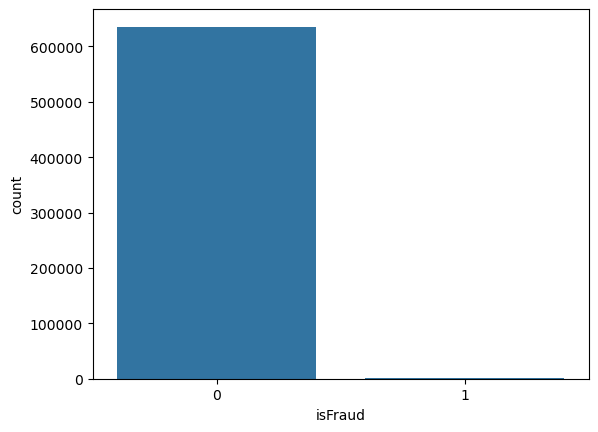

In [12]:
sns.countplot(data=df,x='isFraud')

In [13]:
df['isFraud'].value_counts()

isFraud
0    635441
1       821
Name: count, dtype: int64

<Axes: xlabel='isFlaggedFraud', ylabel='count'>

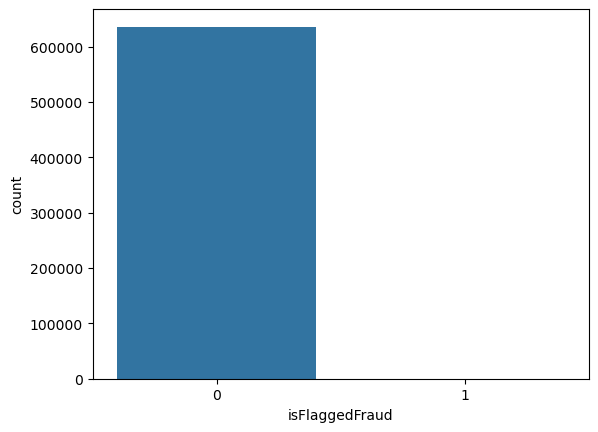

In [14]:
sns.countplot(data=df,x='isFlaggedFraud')

In [15]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    636260
1         2
Name: count, dtype: int64

In [16]:
df[df['isFlaggedFraud']==1]

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
386601,554,TRANSFER,3576297.10,3576297.10,3576297.10,0.0,0.0,1,1
566452,212,TRANSFER,4953893.08,4953893.08,4953893.08,0.0,0.0,1,1


* from the above analysis we acn see that isFlaggedFraud has only 2 values with account that has flagged as farud hence we will remove the this feature as it doesnt make much sence

In [17]:
(df.isFraud.value_counts()/df.isFraud.size)*100

isFraud
0    99.870965
1     0.129035
Name: count, dtype: float64

* more than 90% of data is 0 or not fraud 

* from above we can see that most of the fraud are happening through transfer and cash out

In [18]:
total=df['type'].size
print(total)
value_types=(df['type'].value_counts()/total)*100
value_types

636262


type
CASH_OUT    35.239571
PAYMENT     33.786082
CASH_IN     21.942847
TRANSFER     8.376109
DEBIT        0.655390
Name: count, dtype: float64

In [19]:
type(value_types)

pandas.core.series.Series

Text(0.5, 0, 'Count by Total percentage(%)')

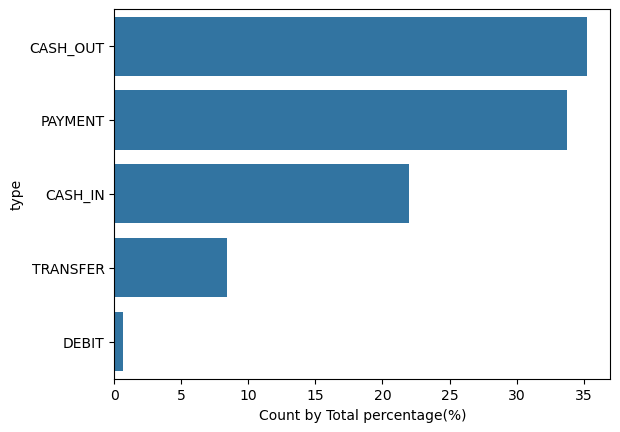

In [20]:
sns.barplot(y=value_types.index,x=value_types.values)
plt.xlabel('Count by Total percentage(%)')

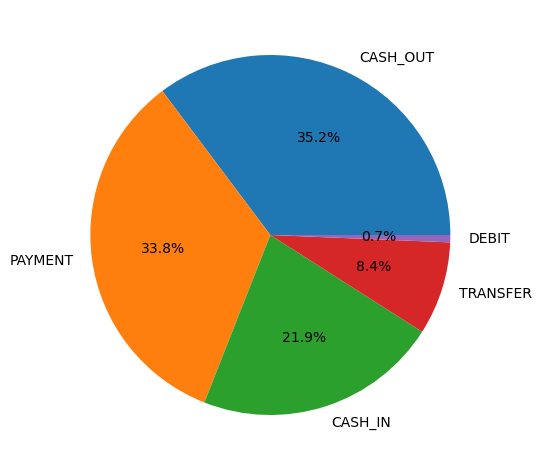

In [21]:
df['type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('')
plt.tight_layout()

* most of the type of of tansaction are are by cash out , payment whcih occupies nearly 69% percent

In [22]:
df_1 = df.groupby('type')['step'].agg(['median'])
df_1

,median
type,
CASH_IN,239.0
CASH_OUT,236.0
DEBIT,250.0
PAYMENT,241.0
TRANSFER,250.0


<Axes: xlabel='type', ylabel='step'>

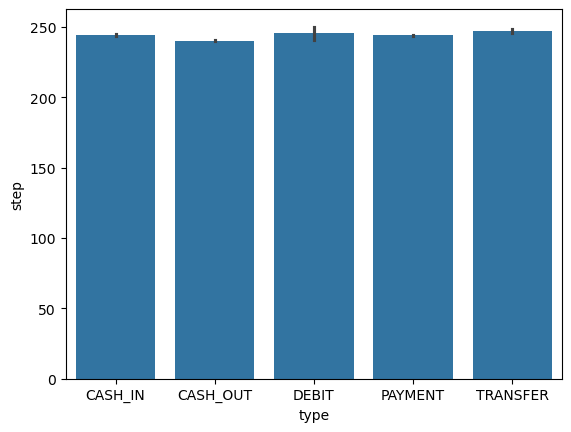

In [23]:
sns.barplot(data=df,x='type',y='step')

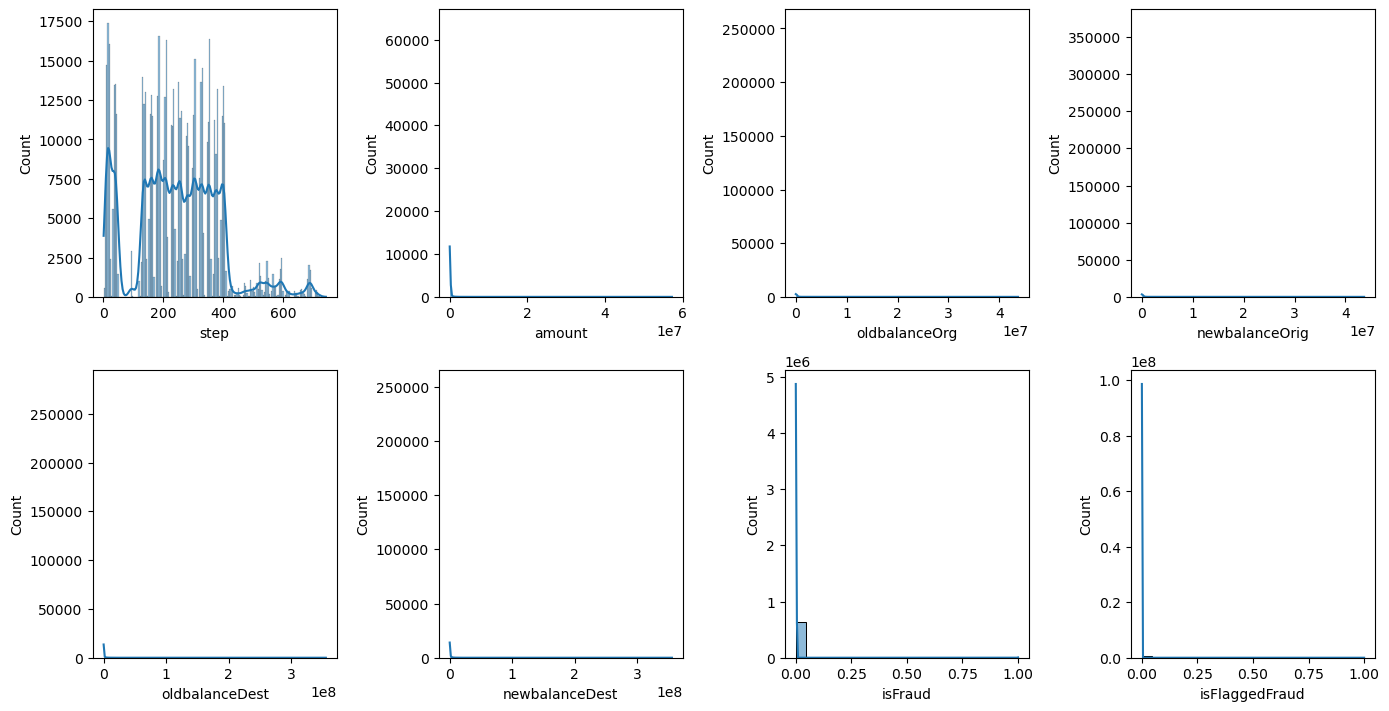

In [24]:
plt.figure(figsize=(14,14))
for i,col in enumerate(num_col):
    plt.subplot(4,4,i+1)
    sns.histplot(data=df,x=col,kde=True)
plt.tight_layout()

C:\Users\K.A Mohammed Yusuf\AppData\Local\Temp\ipykernel_804\2986857724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\K.A Mohammed Yusuf\AppData\Local\Temp\ipykernel_804\2986857724.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\K.A Mohammed Yusuf\Ap

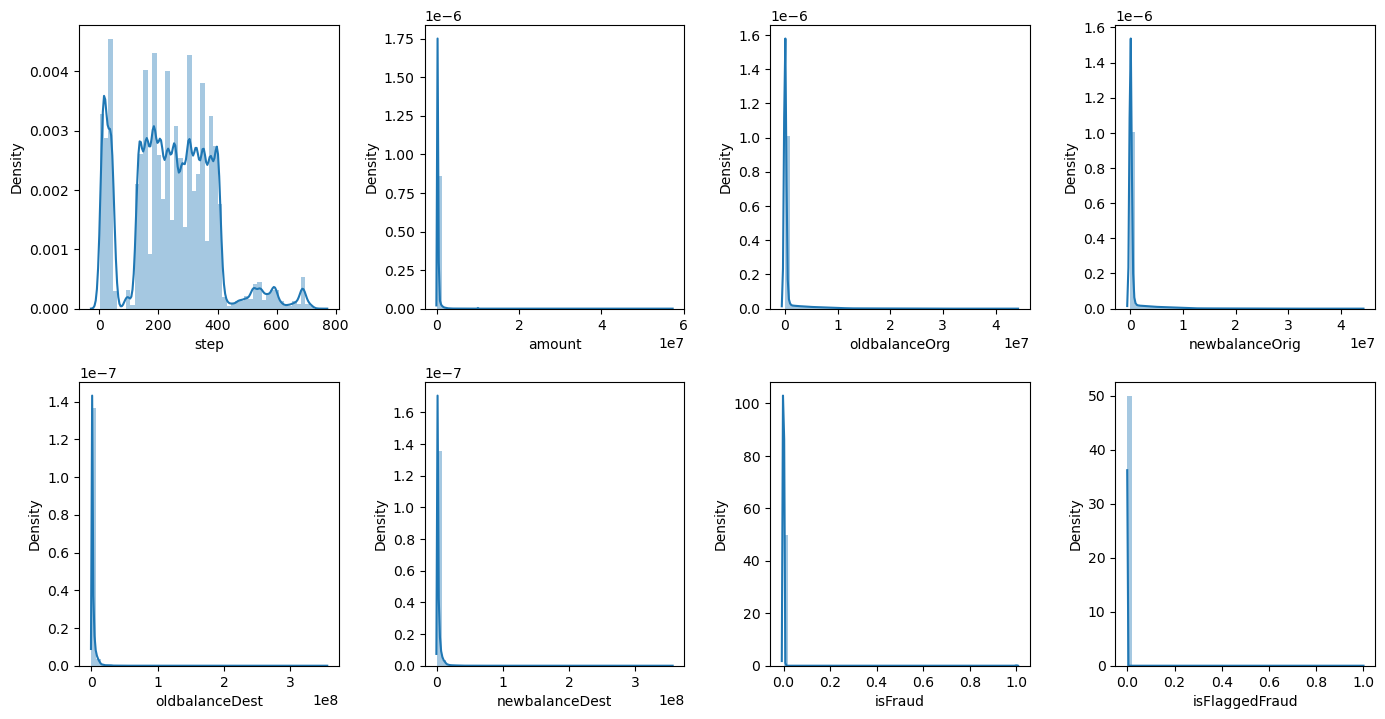

In [25]:
plt.figure(figsize=(14,14))
for i,col in enumerate(num_col):
    plt.subplot(4,4,i+1)
    sns.distplot(df[col])
plt.tight_layout()

### Bivariate Analysis

<Axes: xlabel='type', ylabel='count'>

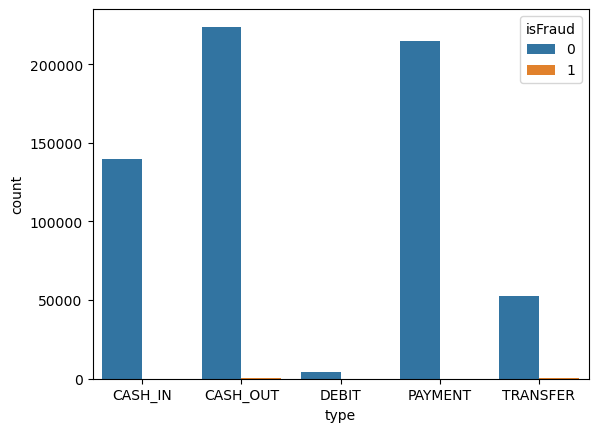

In [26]:
sns.countplot(data=df, x='type', hue='isFraud')

* most of the fraud takes place by either cash out or transfer

ValueError: num must be an integer with 1 <= num <= 6, not 7

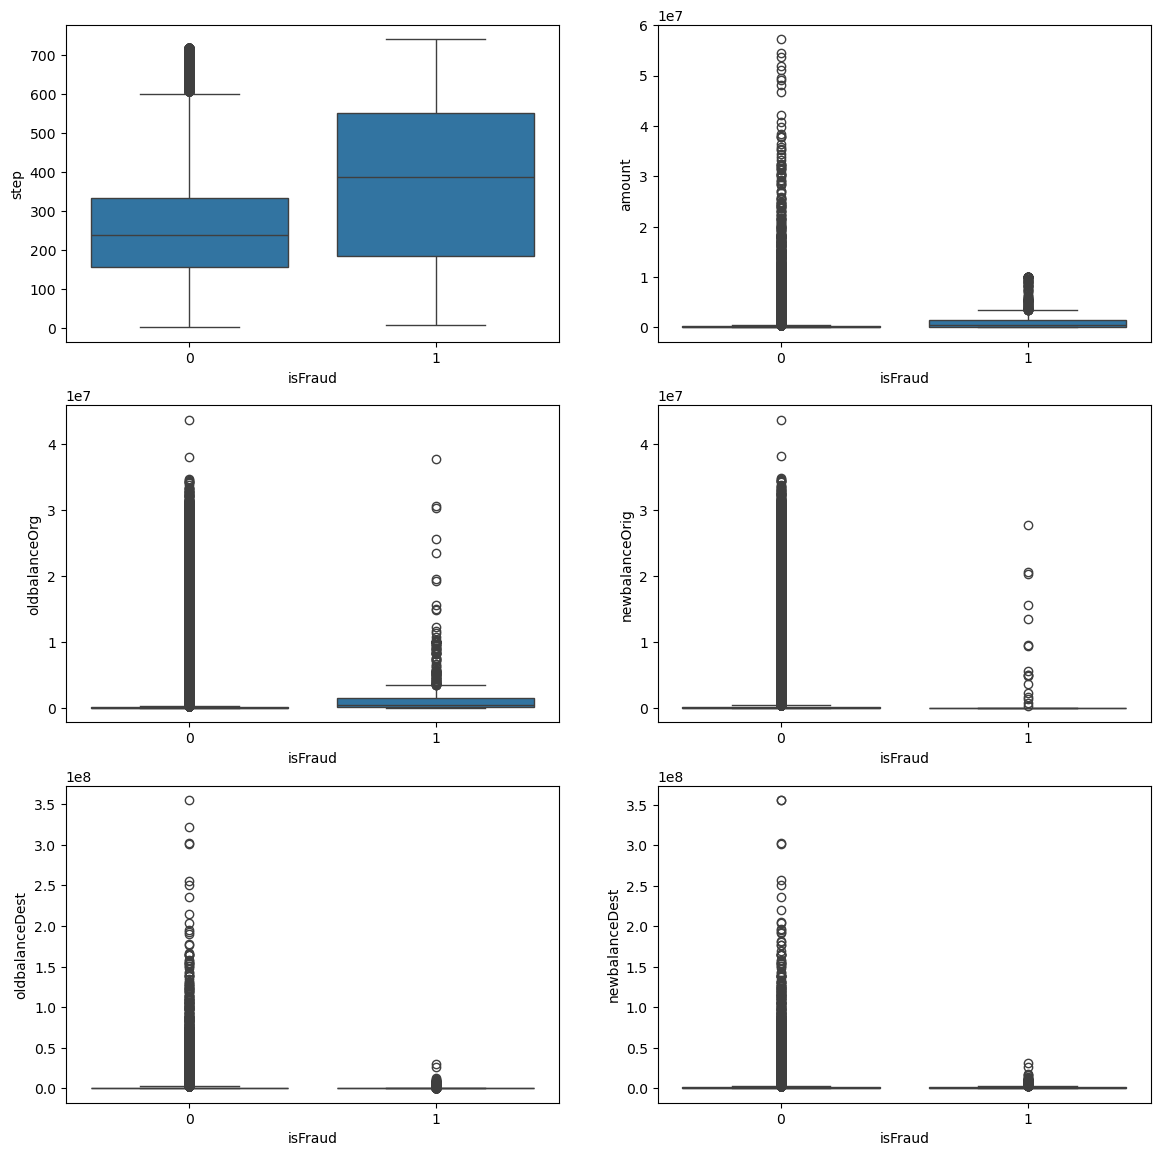

In [27]:
plt.figure(figsize=(14,14))
for i,col in enumerate(num_col):
    plt.subplot(3,2,i+1)
    sns.boxplot(data=df,y=col,x='isFraud')
plt.tight_layout()

* we cant tell much from the above so we will try to use different plots to understand the data as much as possible

<Axes: xlabel='isFraud', ylabel='amount'>

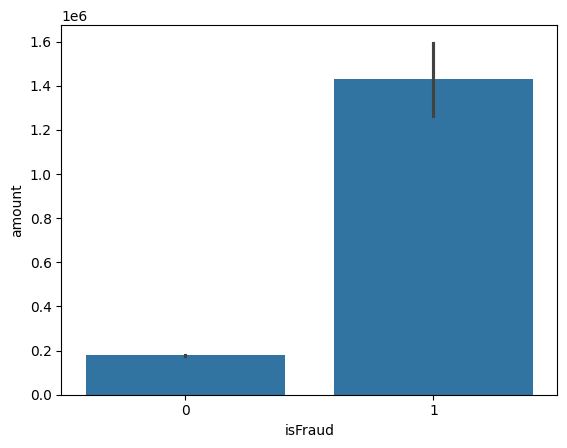

In [3]:
sns.barplot(data=df,x='isFraud',y='amount')

* we see that most of the fraud transaction takes place by the amount having 0.2*100000=200k

<Axes: xlabel='isFraud', ylabel='step'>

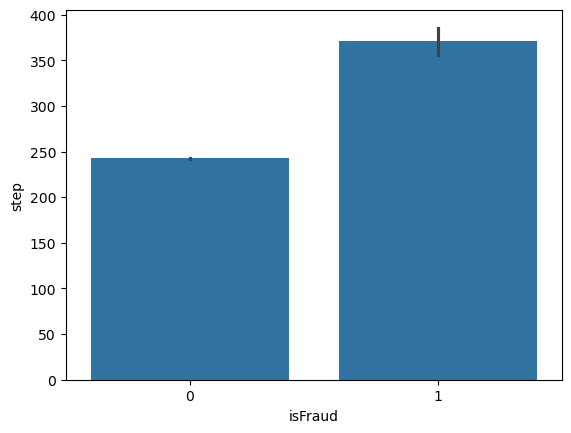

In [28]:
sns.barplot(data=df,x='isFraud',y='step')

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

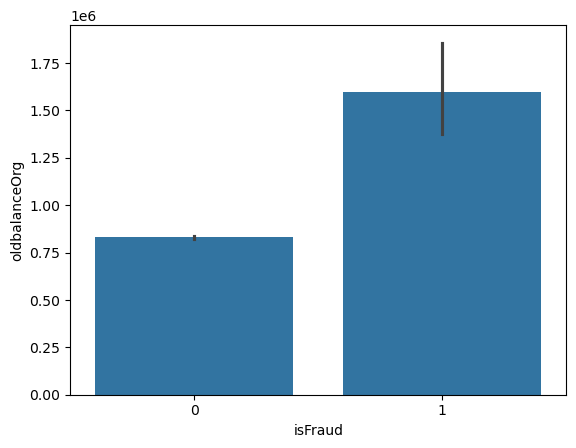

In [29]:
sns.barplot(data=df,x='isFraud',y='oldbalanceOrg')

<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

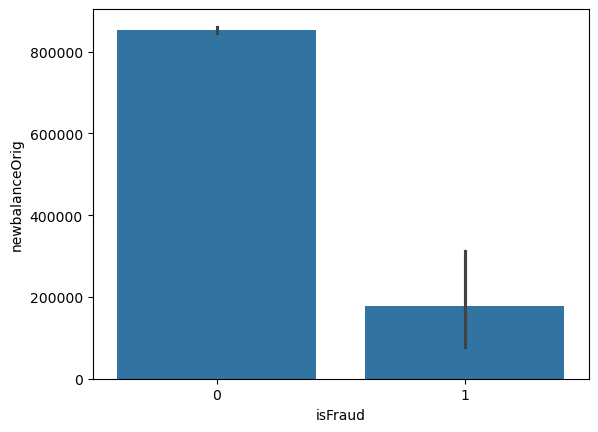

In [30]:
sns.barplot(data=df,x='isFraud',y='newbalanceOrig')

<Axes: xlabel='isFraud', ylabel='oldbalanceDest'>

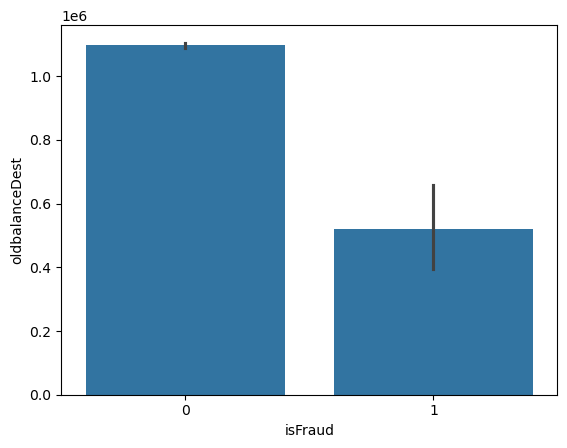

In [31]:
sns.barplot(data=df,x='isFraud',y='oldbalanceDest')

<Axes: xlabel='isFraud', ylabel='newbalanceDest'>

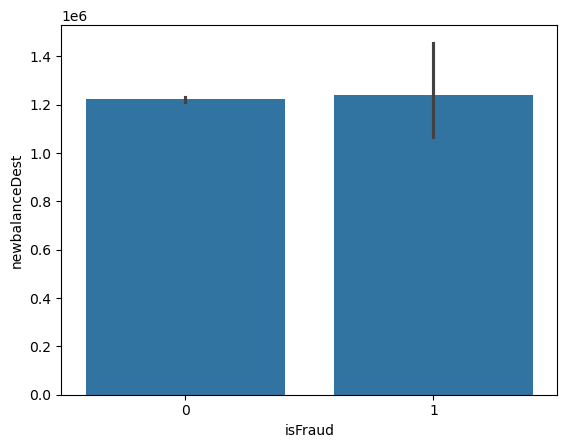

In [32]:
sns.barplot(data=df,x='isFraud',y='newbalanceDest')

#### summary
* we see that most of the fraud transaction takes place by the amount having 0.2*100000=200k
* The higher the step count the higher the chances of fraud transaction
* If new balance of original account holder is greater than '2000000' then the chances fraud transaction is very less
* If old balance of original account holder is greater than '0.8*1000000' then chances fraud transaction is very high
* similarly if the the old balance of the destination account has mony greater than '0.55*1000000' then the chances fraud transaction is very less

<Axes: xlabel='isFraud', ylabel='isFlaggedFraud'>

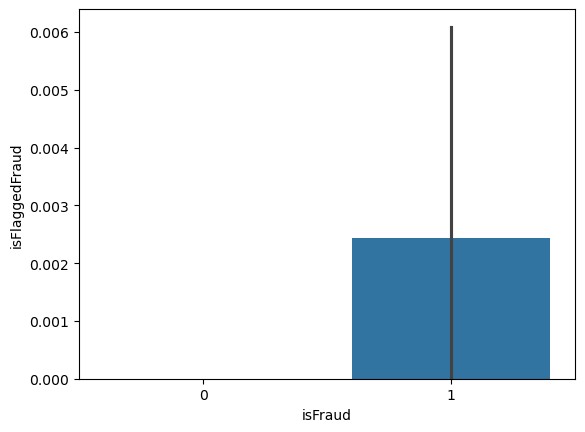

In [33]:
sns.barplot(data=df,x='isFraud',y='isFlaggedFraud')

### Multivariate Analysis

<Axes: >

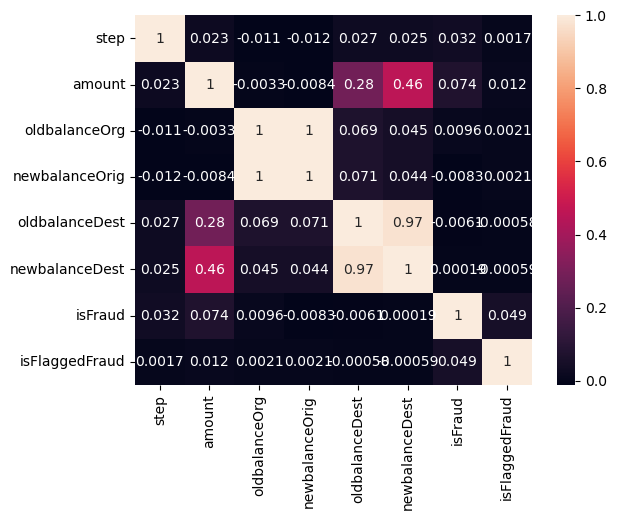

In [34]:
sns.heatmap(data=df.select_dtypes(exclude=['object']).corr(),annot=True)

* newbalanceDest and oldbalanceDest has correlation higher than 0.95 but the features are important because it gives the addition/missing of amount in the destination account holder 
* newbalanceOrig and oldbalanceOrg has correlation higher than 1 but the features are important because it gives the addition/missing of amount in the destination account holder

# Outlier detection

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, 'step'),
  Text(2, 0, 'amount'),
  Text(3, 0, 'oldbalanceOrg'),
  Text(4, 0, 'newbalanceOrig'),
  Text(5, 0, 'oldbalanceDest'),
  Text(6, 0, 'newbalanceDest'),
  Text(7, 0, 'isFraud'),
  Text(8, 0, 'isFlaggedFraud')])

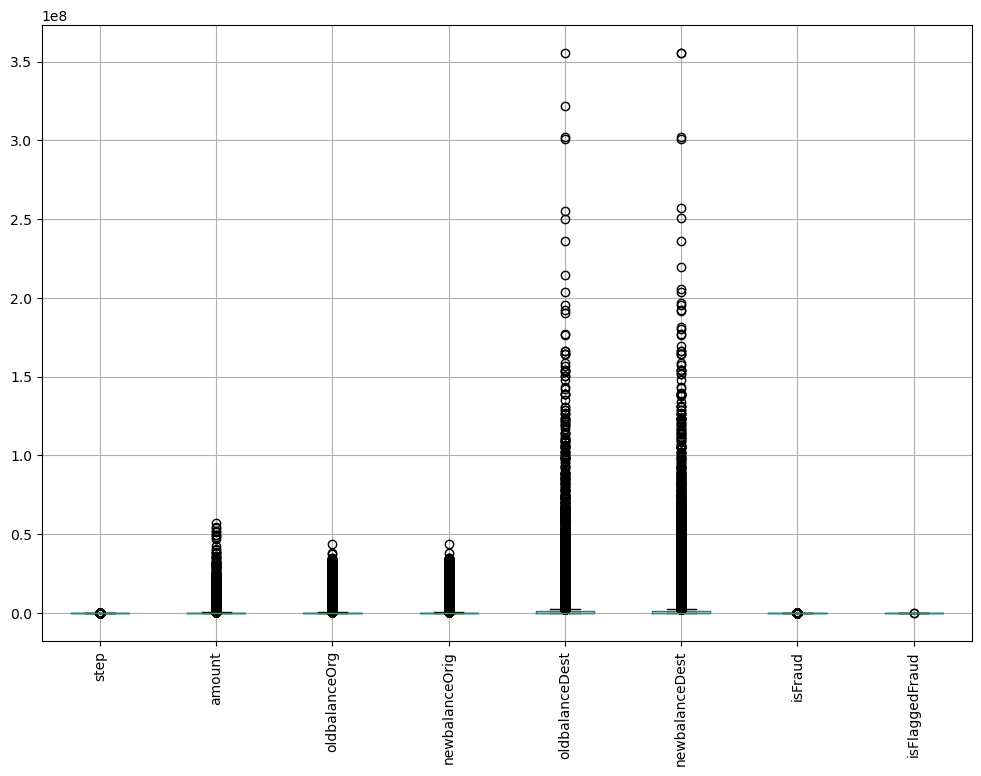

In [35]:
plt.figure(figsize=(12,8))
df.boxplot()
plt.xticks(rotation=90)

* every features has an outlier but the outliers are valid hence we will not remove the outliers 
* we will use scaling to mininmize the effect of scaling

# Feature Engineering

* we will create a new feature by difference of new and old balance of original account. By This we will get the amount that has been transacted
* Similarly we will create a new feature by difference of new and old balance of destination account. By This we will get the amount that has been transacted

In [6]:
df['diff_new_old_org']=df['newbalanceOrig']-df['oldbalanceOrg']
df['diff_new_old_Dest']=df['newbalanceDest']-df['oldbalanceDest']

In [7]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,diff_new_old_org,diff_new_old_Dest
0,283,CASH_IN,210329.84,3778062.79,3988392.64,1519266.60,1308936.76,0,0,210329.85,-210329.84
1,132,CASH_OUT,215489.19,21518.00,0.00,6345756.55,6794954.89,0,0,-21518.00,449198.34
2,355,DEBIT,4431.05,20674.00,16242.95,80876.56,85307.61,0,0,-4431.05,4431.05
3,135,CASH_OUT,214026.20,46909.73,0.00,13467450.36,13681476.56,0,0,-46909.73,214026.20
4,381,CASH_OUT,8858.45,0.00,0.00,1667180.58,1676039.03,0,0,0.00,8858.45


<Axes: xlabel='isFraud', ylabel='diff_new_old_org'>

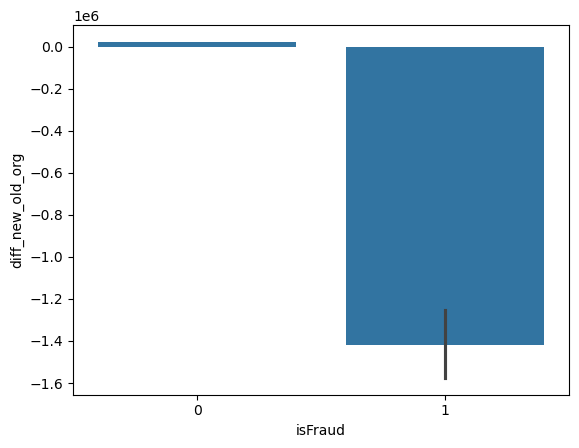

In [17]:
sns.barplot(data=df,x='isFraud',y='diff_new_old_org')

<Axes: xlabel='isFraud', ylabel='diff_new_old_Dest'>

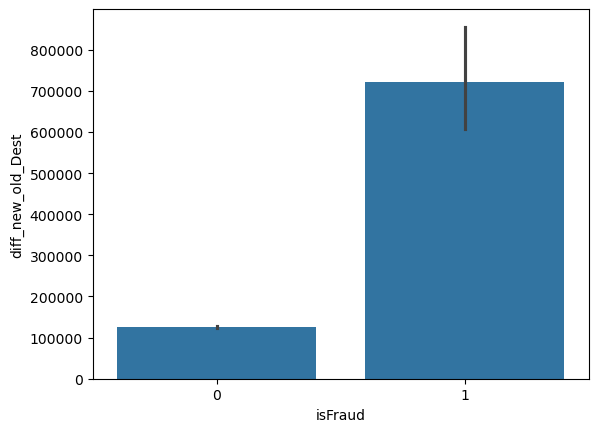

In [14]:
sns.barplot(data=df,x='isFraud',y='diff_new_old_Dest')

* from this new feature we can clearly see that if the higher the transaction amount is the hiher tah fraud chances are
* And we also see that the destination account that had the amount more than '150000' being tansacted will be guarenteed or will have the higher chances that the transaction is fraudulent

### Feature selection

<Axes: >

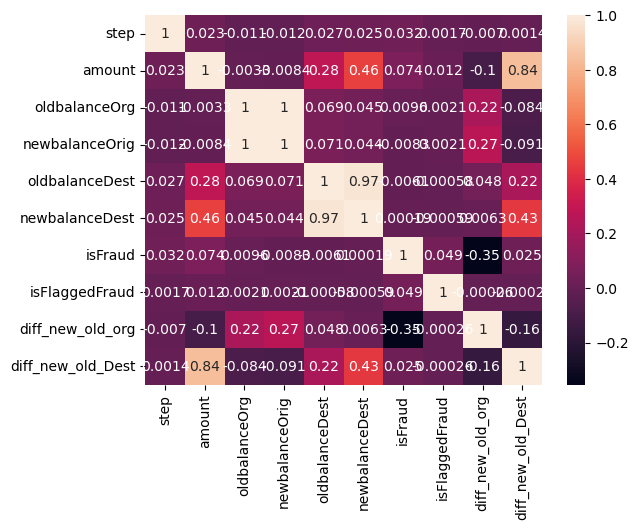

In [15]:
sns.heatmap(data=df.select_dtypes(exclude=['object']).corr(),annot=True)

* we will drop drop the feature having the correlation higher tahn 0.95 and the isflagged feature as it doesnt have much data

In [8]:
df.drop(['newbalanceOrig','newbalanceDest','isFlaggedFraud'],axis=1,inplace=True)

In [9]:
df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,diff_new_old_org,diff_new_old_Dest
0,283,CASH_IN,210329.84,3778062.79,1519266.60,0,210329.85,-210329.84
1,132,CASH_OUT,215489.19,21518.00,6345756.55,0,-21518.00,449198.34
2,355,DEBIT,4431.05,20674.00,80876.56,0,-4431.05,4431.05
3,135,CASH_OUT,214026.20,46909.73,13467450.36,0,-46909.73,214026.20
4,381,CASH_OUT,8858.45,0.00,1667180.58,0,0.00,8858.45


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636262 entries, 0 to 636261
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   step               636262 non-null  int64  
 1   type               636262 non-null  object 
 2   amount             636262 non-null  float64
 3   oldbalanceOrg      636262 non-null  float64
 4   oldbalanceDest     636262 non-null  float64
 5   isFraud            636262 non-null  int64  
 6   diff_new_old_org   636262 non-null  float64
 7   diff_new_old_Dest  636262 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 38.8+ MB


# data split

In [10]:
x=df.drop(['isFraud'],axis=1)
y=df['isFraud']

In [45]:
x

,step,type,amount,oldbalanceOrg,oldbalanceDest,diff_new_old_org,diff_new_old_Dest
0,283,CASH_IN,210329.84,3778062.79,1519266.60,210329.85,-210329.84
1,132,CASH_OUT,215489.19,21518.00,6345756.55,-21518.00,449198.34
2,355,DEBIT,4431.05,20674.00,80876.56,-4431.05,4431.05
3,135,CASH_OUT,214026.20,46909.73,13467450.36,-46909.73,214026.20
4,381,CASH_OUT,8858.45,0.00,1667180.58,0.00,8858.45
...,...,...,...,...,...,...,...
636257,351,CASH_OUT,28761.10,0.00,328534.52,0.00,28761.10
636258,184,CASH_OUT,167820.71,62265.00,106429.48,-62265.00,167820.70
636259,35,PAYMENT,8898.12,30808.00,0.00,-8898.12,0.00
636260,277,CASH_OUT,176147.90,83669.00,0.00,-83669.00,176147.90


In [46]:
y

0         0
1         0
2         0
3         0
4         0
         ..
636257    0
636258    0
636259    0
636260    0
636261    0
Name: isFraud, Length: 636262, dtype: int64

In [47]:
y.value_counts()

isFraud
0    635441
1       821
Name: count, dtype: int64

In [11]:
# import the train_test_split
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
print(x_train.info(),y_train.info())
print(x_test,y_test)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509009 entries, 410203 to 121958
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   step               509009 non-null  int64  
 1   type               509009 non-null  object 
 2   amount             509009 non-null  float64
 3   oldbalanceOrg      509009 non-null  float64
 4   oldbalanceDest     509009 non-null  float64
 5   diff_new_old_org   509009 non-null  float64
 6   diff_new_old_Dest  509009 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 31.1+ MB
<class 'pandas.core.series.Series'>
Int64Index: 509009 entries, 410203 to 121958
Series name: isFraud
Non-Null Count   Dtype
--------------   -----
509009 non-null  int64
dtypes: int64(1)
memory usage: 7.8 MB
None None
        step      type     amount  oldbalanceOrg  oldbalanceDest  \
492123    37  CASH_OUT  267289.58      397858.58      3664138.94   
370792   234   PAYMENT   5

### scaling and Encoding

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
std_col=['step', 'amount', 'oldbalanceOrg', 'oldbalanceDest','diff_new_old_org', 'diff_new_old_Dest']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), std_col),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['type'])
    ]
)

In [15]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['step', 'amount', 'oldbalanceOrg',
                                  'oldbalanceDest', 'diff_new_old_org',
                                  'diff_new_old_Dest']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['type'])])

In [16]:
x_train=preprocessor.fit_transform(x_train)
x_test=preprocessor.transform(x_test)

In [17]:
print(x_train)
print(x_test)

[[-1.42632963 -0.24770485 -0.27754613 ...  0.          0.
   0.        ]
 [-0.38609997 -0.05801834  1.84026091 ...  0.          0.
   0.        ]
 [-0.1119854   1.00752774 -0.2883158  ...  0.          0.
   1.        ]
 ...
 [ 0.22538638  0.08134511 -0.28829852 ...  0.          0.
   0.        ]
 [-0.44935718 -0.2516539   0.12071502 ...  0.          0.
   0.        ]
 [-1.58798694 -0.25101724 -0.19343059 ...  0.          0.
   0.        ]]
[[-1.44741537  0.14467989 -0.15081041 ...  0.          0.
   0.        ]
 [-0.06278535 -0.21027396 -0.2883158  ...  0.          1.
   0.        ]
 [ 3.12116083 -0.23755802 -0.2883158  ...  0.          1.
   0.        ]
 ...
 [-1.41930105 -0.27117158 -0.2883158  ...  0.          1.
   0.        ]
 [-0.27364271 -0.27707087 -0.28455172 ...  0.          1.
   0.        ]
 [-0.56884302  0.04800312 -0.28285303 ...  0.          0.
   0.        ]]


In [55]:
import joblib
joblib.dump(preprocessor, "preprocessor.pkl")

['preprocessor.pkl']

#### summary
* we will apply OHE for type col
* apply standard scaling for the other numerical columns or features

# model Training and Selection

In [57]:
!pip install lightgbm

In [18]:
# import all the models and testing_metrics
from xgboost  import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.svm          import SVC
from sklearn.dummy        import DummyClassifier
from sklearn.ensemble     import RandomForestClassifier
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics         import balanced_accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics         import recall_score, f1_score, make_scorer, cohen_kappa_score
from sklearn.preprocessing   import MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold

In [19]:
def ml_score(model,y_test,y_predict):
    scores={
        'model_name':model,
        'balanced_accuracy_score':balanced_accuracy_score(y_test,y_predict),
        'precision':precision_score(y_test,y_predict),
        'recall_score':recall_score(y_test,y_predict),
        'f1_score':f1_score(y_test,y_predict)
           }
    score_df=pd.DataFrame([scores])
    return score_df
    

In [20]:
from sklearn.model_selection import cross_validate

def cv_score(model_name,model, X, y, cv=5):
    scoring = {
        "bal_accuracy": "balanced_accuracy",
        "precision": "precision",
        "recall": "recall",
        "f1": "f1"
    }

    results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=scoring,
        return_train_score=False
    )

    return pd.DataFrame([{
        'model_name':model_name,
        'balanced_accuracy_score':results["test_bal_accuracy"].mean(),
        'precision':results["test_precision"].mean(),
        'recall_score':results["test_recall"].mean(),
        'f1_score':results["test_f1"].mean()
    }])

## Logistic Regression

In [61]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [62]:
y_pred=lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
lr_score=ml_score('logistic_reg',y_test,y_pred)
lr_score

,model_name,balanced_accuracy_score,precision,recall_score,f1_score
0,logistic_reg,0.743993,0.854167,0.488095,0.621212


In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127085
           1       0.85      0.49      0.62       168

    accuracy                           1.00    127253
   macro avg       0.93      0.74      0.81    127253
weighted avg       1.00      1.00      1.00    127253



In [65]:
lr_cv_score=cv_score('logistic_reg',lr,x_train,y_train)
lr_cv_score

,model_name,balanced_accuracy_score,precision,recall_score,f1_score
0,logistic_reg,0.731236,0.884351,0.462548,0.605426


## KNN

In [66]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [67]:
y_pred=knn.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [68]:
knn_score=ml_score('knn',y_test,y_pred)
knn_score

,model_name,balanced_accuracy_score,precision,recall_score,f1_score
0,knn,0.809481,0.904348,0.619048,0.734982


In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127085
           1       0.90      0.62      0.73       168

    accuracy                           1.00    127253
   macro avg       0.95      0.81      0.87    127253
weighted avg       1.00      1.00      1.00    127253



In [70]:
knn_cv_score=cv_score('knn',knn,x_train,y_train)
knn_cv_score

,model_name,balanced_accuracy_score,precision,recall_score,f1_score
0,knn,0.764949,0.901615,0.529971,0.666412


## SVM

In [71]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [72]:
y_pred=svc.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
svc_score=ml_score('SVC',y_test,y_pred)
svc_score

,model_name,balanced_accuracy_score,precision,recall_score,f1_score
0,SVC,0.764869,0.967391,0.529762,0.684615


In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127085
           1       0.97      0.53      0.68       168

    accuracy                           1.00    127253
   macro avg       0.98      0.76      0.84    127253
weighted avg       1.00      1.00      1.00    127253



In [75]:
svc_cv_score=cv_score('SVC',svc,x_train,y_train)
svc_cv_score

,model_name,balanced_accuracy_score,precision,recall_score,f1_score
0,SVC,0.725158,0.985898,0.450323,0.615605


## Random Forest

In [21]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [22]:
y_pred=rfc.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
rfc_score=ml_score('Random Forest',y_test,y_pred)
rfc_score

,model_name,balanced_accuracy_score,precision,recall_score,f1_score
0,Random Forest,0.866056,0.968504,0.732143,0.833898


In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127085
           1       0.97      0.73      0.83       168

    accuracy                           1.00    127253
   macro avg       0.98      0.87      0.92    127253
weighted avg       1.00      1.00      1.00    127253



In [25]:
rfc_cv_score=cv_score('Random Forest',rfc,x_train,y_train,3)
rfc_cv_score

,model_name,balanced_accuracy_score,precision,recall_score,f1_score
0,Random Forest,0.856817,0.974786,0.713659,0.823897


## XGBCLassifier

In [61]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [62]:
y_pred=xgb.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
xgb_score=ml_score('XGBClassifier',y_test,y_pred)
xgb_score

,model_name,balanced_accuracy_score,precision,recall_score,f1_score
0,XGBClassifier,0.874957,0.919708,0.75,0.82623


In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127085
           1       0.92      0.75      0.83       168

    accuracy                           1.00    127253
   macro avg       0.96      0.87      0.91    127253
weighted avg       1.00      1.00      1.00    127253



In [65]:
xgb_cv_score=cv_score('XGBClassifier',xgb,x_train,y_train)
xgb_cv_score

,model_name,balanced_accuracy_score,precision,recall_score,f1_score
0,XGBClassifier,0.870631,0.936478,0.741327,0.826438


## LightGBM

In [86]:
lgbm=LGBMClassifier()
lgbm.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 653, number of negative: 508356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1540
[LightGBM] [Info] Number of data points in the train set: 509009, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001283 -> initscore=-6.657360
[LightGBM] [Info] Start training from score -6.657360


LGBMClassifier()

In [87]:
y_pred=lgbm.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [88]:
lgbm_score=ml_score('LGBM',y_test,y_pred)
lgbm_score

,model_name,balanced_accuracy_score,precision,recall_score,f1_score
0,LGBM,0.609234,0.141221,0.220238,0.172093


In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127085
           1       0.14      0.22      0.17       168

    accuracy                           1.00    127253
   macro avg       0.57      0.61      0.59    127253
weighted avg       1.00      1.00      1.00    127253



In [90]:
lgbm_cv_score=cv_score('LGBM',lgbm,x_train,y_train)
lgbm_cv_score

[LightGBM] [Info] Number of positive: 523, number of negative: 406684
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1540
[LightGBM] [Info] Number of data points in the train set: 407207, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001284 -> initscore=-6.656210
[LightGBM] [Info] Start training from score -6.656210
[LightGBM] [Info] Number of positive: 522, number of negative: 406685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1540
[LightGBM] [Info] Number of data points in the train set: 407207, number of used features: 11
[LightGBM] [Info] 

,model_name,balanced_accuracy_score,precision,recall_score,f1_score
0,LGBM,0.719034,0.272487,0.442572,0.317285


## model selection

In [91]:
models_score=pd.concat([lr_score,knn_score,svc_score,rfc_score,xgb_score,lgbm_score]).sort_values('f1_score',ascending=False)
models_score

,model_name,balanced_accuracy_score,precision,recall_score,f1_score
0,Random Forest,0.863083,0.976000,0.726190,0.832765
0,XGBClassifier,0.874957,0.919708,0.750000,0.826230
0,knn,0.809481,0.904348,0.619048,0.734982
0,SVC,0.764869,0.967391,0.529762,0.684615
0,logistic_reg,0.743993,0.854167,0.488095,0.621212
0,LGBM,0.609234,0.141221,0.220238,0.172093


In [92]:
models_cv_score=pd.concat([lr_cv_score,knn_cv_score,svc_cv_score,rfc_cv_score,xgb_cv_score,lgbm_cv_score]).sort_values('f1_score',ascending=False)
models_cv_score

,model_name,balanced_accuracy_score,precision,recall_score,f1_score
0,Random Forest,0.859143,0.987152,0.718297,0.831070
0,XGBClassifier,0.869862,0.936336,0.739789,0.825492
0,knn,0.764949,0.901615,0.529971,0.666412
0,SVC,0.725158,0.985898,0.450323,0.615605
0,logistic_reg,0.731236,0.884351,0.462548,0.605426
0,LGBM,0.719034,0.272487,0.442572,0.317285


* As we can see from the above data that Random Forest is giving us the best accuracy and presicion value hence w will select Random forest Model and XGB. And finally we will tune the data
*  i will choose XGB as its faster and easy to implement and i tried the random forest hyperparameter tuning and my gets crashing all the time so i choosed xgbclassifier

# Tuning the model

In [ ]:
# n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
# max_features = ['log2', 'sqrt']
# max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
# min_samples_split = [2, 5, 10]
#  min_samples_leaf = [1, 2, 4]

In [ ]:
# param_grids={
#     'criterion':['gini', 'entropy', 'log_loss'],
#     'max_depth':max_depth,
#     'n_estimators':n_estimators,
#     'max_features':max_features,
#     'min_samples_leaf':min_samples_leaf,
#     'min_samples_split':min_samples_split,
# }

In [ ]:
# randomized_cv=RandomizedSearchCV(rfc,param_grids,cv=3,n_jobs=-1,n_iter=25,random_state=42,scoring='f1',verbose=3)
# randomized_cv.fit(x_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


c:\Users\K.A Mohammed Yusuf\OneDrive\Desktop\fraud detection system\venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\K.A Mohammed Yusuf\OneDrive\Desktop\fraud detection system\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\K.A Mohammed Yusuf\OneDrive\Desktop\fraud detection system\venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\K.A Mohammed Yusuf\OneDri

In [ ]:
# randomized_cv.best_pramas_

In [ ]:
# y_pred=randomized_cv.predict(x_test)
# print(classification_report(y_test,y_pred))

In [ ]:
# random_forest_score=ml_score('random Forest',y_test,y_pred)
# random_forest_score

* i was not able to conduct it due to pc is crashing

# XGB

In [66]:
param_grid = {'gamma': [0,0.1,0.2,0.4],
              'learning_rate': [0.01, 0.03, 0.06, 0.1],
              'max_depth': [10,20,30,40,50,60,100],
              'n_estimators': [50,65,80,100,150],
              'reg_alpha': [0,0.1,0.2,0.4],
              'reg_lambda': [0,0.1,0.2]}



In [67]:
xgb_rcv = RandomizedSearchCV(estimator=xgb, scoring='f1',param_distributions=param_grid,
                        n_iter=280, cv=3,verbose=2, random_state=42, n_jobs=-1)
xgb_rcv.fit(x_train,y_train)

Fitting 3 folds for each of 280 candidates, totalling 840 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=280, n_jobs=-1,
                   param_distributions={'gamma': [0, 0.1, 0.2, 0.4],
                                        'learning_rate': [0.01, 0.03, 0.06,
                                                          0.1],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      100],
                                        'n_estimators': [50, 65, 80, 100, 150],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4],
                                        'reg_lambda': [0, 0.1, 0.2]},
                   random_state=42, scoring='f1', verbose=2)

In [68]:
rcv_params=xgb_rcv.best_params_
rcv_params

{'reg_lambda': 0,
 'reg_alpha': 0.2,
 'n_estimators': 150,
 'max_depth': 10,
 'learning_rate': 0.06,
 'gamma': 0.4}

In [69]:
y_pred=xgb_rcv.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127085
           1       0.95      0.76      0.84       168

    accuracy                           1.00    127253
   macro avg       0.97      0.88      0.92    127253
weighted avg       1.00      1.00      1.00    127253



In [70]:
xgb_score=ml_score('xgb',y_test,y_pred)
xgb_score

,model_name,balanced_accuracy_score,precision,recall_score,f1_score
0,xgb,0.877949,0.947761,0.755952,0.84106


#### chack over/under fit

In [71]:
y_train_pred=xgb_rcv.predict(x_train)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    508356
           1       1.00      0.84      0.92       653

    accuracy                           1.00    509009
   macro avg       1.00      0.92      0.96    509009
weighted avg       1.00      1.00      1.00    509009



In [72]:
xgb_score_check_fit=ml_score('xgb_fit',y_train,y_train_pred)
xgb_score_check_fit

,model_name,balanced_accuracy_score,precision,recall_score,f1_score
0,xgb_fit,0.921899,1.0,0.843798,0.915282


* The data is neither over nor under fit

In [73]:
model=xgb_rcv.best_estimator_
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.4, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.06, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, ...)

In [74]:
joblib.dump(model,'model.pkl')

['model.pkl']